# BUISNESS EXPLORER

## ABOUT THIS NOTEBOOK OR PROJECT

#### This basically explore city of your choice (ex. i choosed delhi) explore neighborhood in delhi and then segmenting and clustering neighborhoods in delhi based on borough or neighborhood information and then explore cluster wise means that venue category present in cluster, same thing doing for borough wise , neighbor wise in selected cluster  

In [2]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into longitude and latitude
import requests # library to handle requests
from pandas.io.json import json_normalize
import folium
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
print('libraries imported!')

libraries imported!


In [3]:
df=pd.read_csv('Delhi_data.csv')
df.head()

,Unnamed: 0,Borough,Neighborhood
0,0,North West Delhi,Adarsh Nagar
1,1,North West Delhi,Ashok Vihar
2,2,North West Delhi,Azadpur
3,3,North West Delhi,Bawana
4,4,North West Delhi,Begum Pur


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.isnull().sum()

Borough         0
Neighborhood    0
dtype: int64

In [5]:
df.shape

(172, 2)

In [6]:
boolean = df.duplicated(subset=['Neighborhood']) # False
boolean

0      False
1      False
2      False
3      False
4      False
       ...  
167    False
168    False
169    False
170    False
171    False
Length: 172, dtype: bool

In [7]:
df[boolean]

,Borough,Neighborhood


In [8]:
boolean = df.duplicated(subset=['Neighborhood']).any() # False
boolean

False

In [9]:
df.head()

,Borough,Neighborhood
0,North West Delhi,Adarsh Nagar
1,North West Delhi,Ashok Vihar
2,North West Delhi,Azadpur
3,North West Delhi,Bawana
4,North West Delhi,Begum Pur


In [10]:
df['latitude']=''
df['longitude']=''
# now we get geographical coordinates of neighborhoods
drop_unknown = []
geolocator = Nominatim(user_agent="DELHI_EXPLORER")
for index, row in df.iterrows():
    address = row['Neighborhood']+',' + row['Borough']
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df.loc[index, 'latitude'] = latitude
        df.loc[index, 'longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        drop_unknown.append(index)

The geograpical coordinate of Adarsh Nagar,North West Delhi are 28.6141925, 77.0715411848447.
The geograpical coordinate of Ashok Vihar,North West Delhi are 28.6994533, 77.1848256.
The geograpical coordinate of Azadpur,North West Delhi are 28.7076568, 77.1755473.
The geograpical coordinate of Bawana,North West Delhi are 28.79966, 77.0328847.
The geograpical coordinate of Begum Pur,North West Delhi are 28.725503, 77.0583706.
The geograpical coordinate of Dhaka,North West Delhi are 28.70869755, 77.20574900932183.
The geograpical coordinate of Jahangirpuri,North West Delhi are 28.7259717, 77.162658.
The geograpical coordinate of Karala,North West Delhi are 28.73514, 77.0325105.
The geograpical coordinate of Keshav Puram,North West Delhi are 28.6889264, 77.1616833.
The geograpical coordinate of Kingsway Camp,North West Delhi are 28.613749, 77.2121334.
The geograpical coordinate of Kohat Enclave,North West Delhi are 28.6980415, 77.1405393.
The geograpical coordinate of Model Town,North West

In [11]:
drop_unknown

[16, 24, 39, 48, 58, 82, 98, 106, 118, 129, 133, 150, 161]

In [12]:
# drop record who doesn't have latitude or longitude
df['latitude'].replace('', np.nan, inplace=True)
df.dropna(subset=['latitude'], inplace=True)
df.shape

(159, 4)

In [13]:
df.reset_index(drop=True)

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614193,77.0715
1,North West Delhi,Ashok Vihar,28.699453,77.1848
2,North West Delhi,Azadpur,28.707657,77.1755
3,North West Delhi,Bawana,28.799660,77.0329
4,North West Delhi,Begum Pur,28.725503,77.0584
...,...,...,...,...
154,West Delhi,Tihar Village,28.634636,77.1071
155,West Delhi,Tilak Nagar,28.639650,77.094
156,West Delhi,Uttam Nagar,28.619074,77.0567
157,West Delhi,Vikas Nagar,28.644009,77.0545


In [14]:
df.to_csv('data.csv')

In [15]:
df.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614193,77.0715
1,North West Delhi,Ashok Vihar,28.699453,77.1848
2,North West Delhi,Azadpur,28.707657,77.1755
3,North West Delhi,Bawana,28.799660,77.0329
4,North West Delhi,Begum Pur,28.725503,77.0584


In [16]:
df.shape

(159, 4)

In [17]:
df['Neighborhood'].unique().size

159

In [18]:
#get delhi longitude or latitude from address
address = 'Delhi, India'

geolocator = Nominatim(user_agent="Delhi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [19]:
# create map of delhi using latitude and longitude values
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['latitude'], df['longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

#### incase map is not display on github

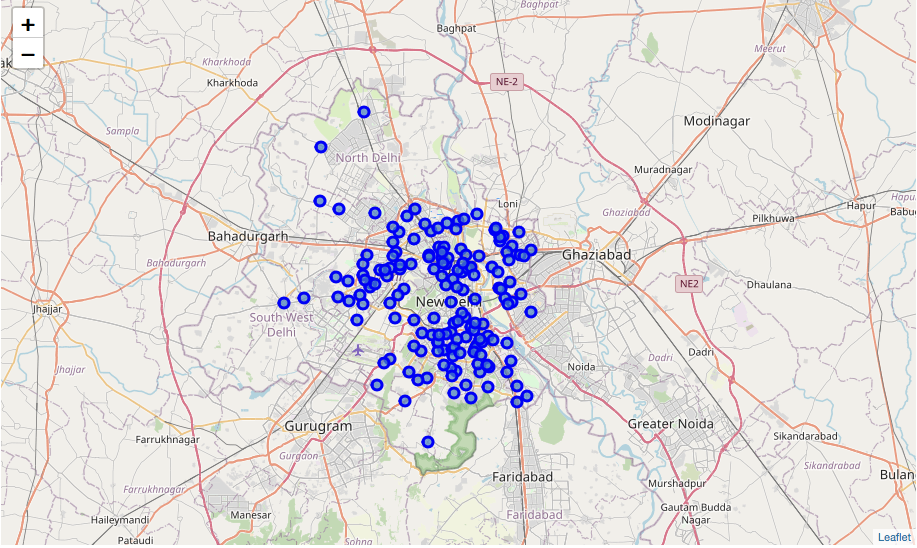

In [21]:
from IPython.display import Image
Image(filename='Delhimap.png') 

#### Foursquare Credentials 

In [22]:
CLIENT_ID = 'B2MMPRZADMCUGDS2DXYJNJWZBBD1WVNMWQ2O5FMXGWRAGFIU' # your Foursquare ID
CLIENT_SECRET = 'PRUDA0BFBIV4K5XTNWEQ0AJCV0RU2COZEBLT5SZKWVGWGT0A' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#### we define a function that explore popular near by venues top 100 venues that are in neighborhood within 1000 meter first we create get request url and then send get request with the help of foursquare api credentials then store in result variable data in JSON format and then clean json and append in venues_list for repeat this process we will create a loop for all neighborhoods in delhi city

In [23]:
def getNearbyVenues(bor, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for bo, name, lat, lng in zip(bor, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            bo,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    return(venues_list)

#### Now write the code to run the above function on each neighborhood

In [24]:
# type your answer here
venues=getNearbyVenues(bor=df['Borough'],
                       names=df['Neighborhood'], 
                       latitudes=df['latitude'], 
                       longitudes=df['longitude'])

Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Begum Pur
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sadar Bazaar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shastri Nagar
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Nand Nagri
Sadatpur
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Daryaganj
Jhandewalan
Karol Bagh
Paharganj
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Patparganj
Preet Vihar
Anand Vihar
Shakarpur
Vasundhara Enclave
Vishwas Nagar
Vivek Vihar
Alaknanda
Chhattarpur
Chittaranjan Park
D

In [25]:
delhi_venue = pd.DataFrame([item for venue_list in venues for item in venue_list])
delhi_venue.columns = ['Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
delhi_venue.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,North West Delhi,Adarsh Nagar,28.614193,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
1,North West Delhi,Adarsh Nagar,28.614193,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
2,North West Delhi,Ashok Vihar,28.699453,77.184826,SNAP FITNESS 24×7 GYM,28.700180,77.184582,Athletics & Sports
3,North West Delhi,Ashok Vihar,28.699453,77.184826,Grand Plaza,28.696577,77.185245,Hotel Bar
4,North West Delhi,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery


In [26]:
delhi_venue.shape

(1116, 8)

In [28]:
delhi_venue.to_csv('delhi_venues.csv')#save file in delhi_venue.csv file

In [29]:
print('There are {} uniques categories.'.format(len(delhi_venue['Venue_Category'].unique())))

There are 165 uniques categories.


In [30]:
delhi_venue.groupby(['Neighborhood']).count()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Neighborhood,,,,,,,
Adarsh Nagar,2,2,2,2,2,2,2
Alaknanda,10,10,10,10,10,10,10
Anand Vihar,3,3,3,3,3,3,3
Ashok Nagar,9,9,9,9,9,9,9
Ashok Vihar,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...
Vasundhara Enclave,4,4,4,4,4,4,4
Vikaspuri,4,4,4,4,4,4,4
Vishwas Nagar,2,2,2,2,2,2,2


In [31]:
# convert venue category column into numric number categorical variable in to dummy variable
delhi_onehot = pd.get_dummies(delhi_venue[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Borough'] = delhi_venue['Borough']
delhi_onehot['Neighborhood'] = delhi_venue['Neighborhood']
delhi_onehot.columns.get_loc('Borough')

165

In [32]:
delhi_onehot.columns.get_loc('Neighborhood')

166

In [33]:
delhi_onehot.shape

(1116, 167)

In [34]:
# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[165]] + [delhi_onehot.columns[166]]+list(delhi_onehot.columns[:165])
delhi_onehot = delhi_onehot[fixed_columns]
delhi_onehot.head()

,Borough,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store
0,North West Delhi,Adarsh Nagar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North West Delhi,Adarsh Nagar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North West Delhi,Ashok Vihar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North West Delhi,Ashok Vihar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North West Delhi,Ashok Vihar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
delhi_onehot.shape

(1116, 167)

In [36]:
delhi_grouped = delhi_onehot.groupby(['Borough', 'Neighborhood']).mean().reset_index()
delhi_grouped

,Borough,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store
0,Central Delhi,Daryaganj,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Central Delhi,Jhandewalan,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Central Delhi,Karol Bagh,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Central Delhi,Paharganj,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.035714,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,East Delhi,Anand Vihar,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,West Delhi,Shivaji Place,0.000000,0.000000,0.0,0.047619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
143,West Delhi,Tihar Village,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
144,West Delhi,Tilak Nagar,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
145,West Delhi,Uttam Nagar,0.363636,0.090909,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.0


In [37]:
X=delhi_grouped.drop(['Borough', 'Neighborhood'], 1)

In [38]:
X.head()

,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### define a function to sort venues in descending order

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough','Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']
neighborhoods_venues_sorted['Borough'] = delhi_grouped['Borough']
for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Delhi,Daryaganj,Indian Restaurant,Restaurant,Hotel,Road,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
1,Central Delhi,Jhandewalan,Hotel,Motorcycle Shop,High School,Light Rail Station,Women's Store,Flea Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop
2,Central Delhi,Karol Bagh,Snack Place,Hotel,Camera Store,Dessert Shop,Donut Shop,Eastern European Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
3,Central Delhi,Paharganj,Hotel,Indian Restaurant,Fast Food Restaurant,Café,Bakery,Breakfast Spot,Snack Place,Bar,Korean Restaurant,Road
4,East Delhi,Anand Vihar,Mobile Phone Shop,Electronics Store,Farm,Women's Store,Flower Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop


#### Silhouette method for find optimal value of k (number of clusters)

For n_clusters = 2 The average silhouette_score is : 0.20842180238796007
For n_clusters = 3 The average silhouette_score is : 0.2166468257169038
For n_clusters = 4 The average silhouette_score is : 0.04501891091236998
For n_clusters = 5 The average silhouette_score is : 0.04372687927686564
For n_clusters = 6 The average silhouette_score is : 0.044710167494982814
For n_clusters = 8 The average silhouette_score is : 0.04354188387909757


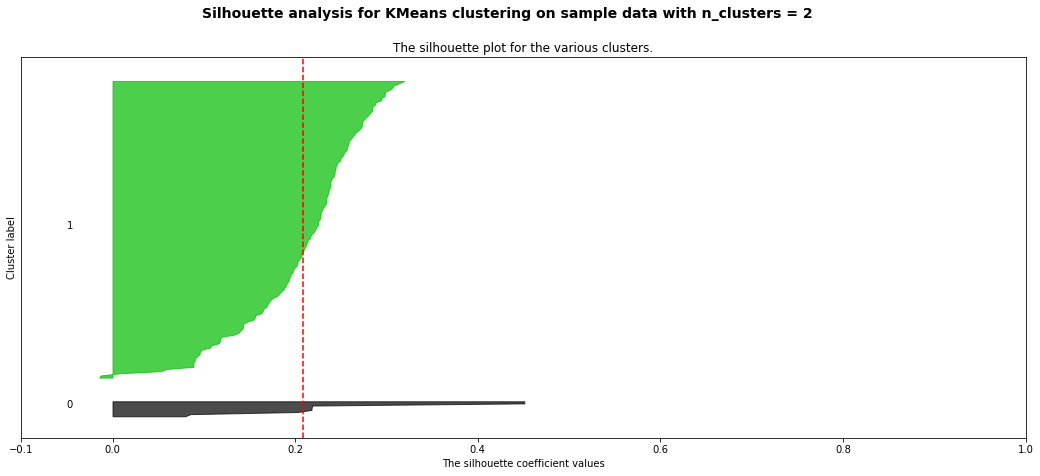

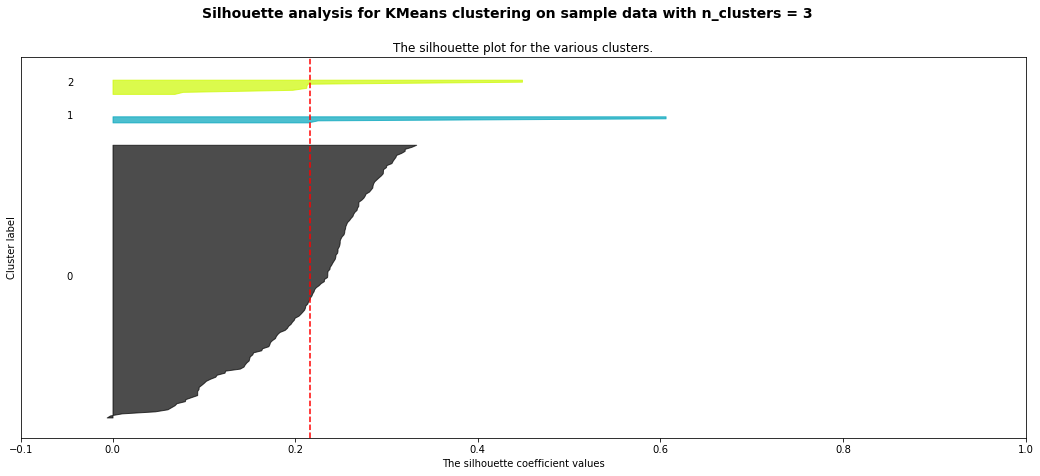

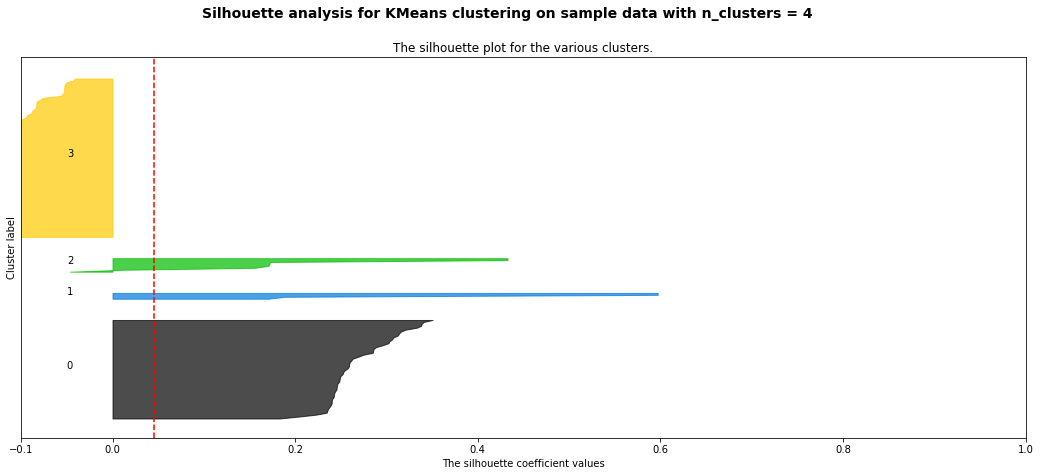

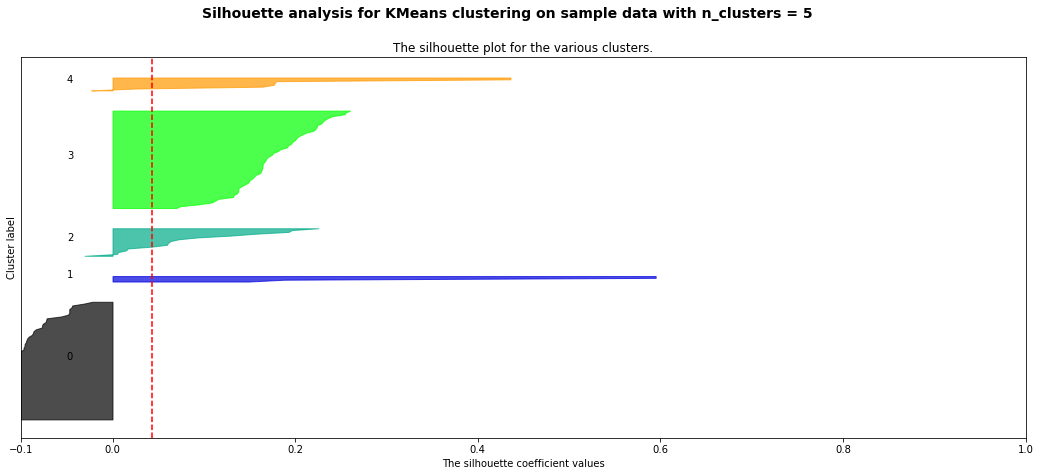

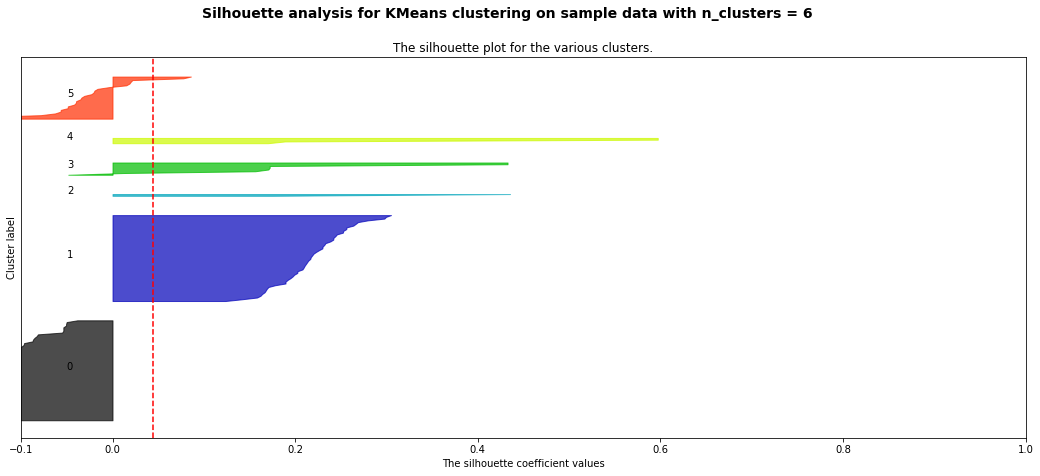

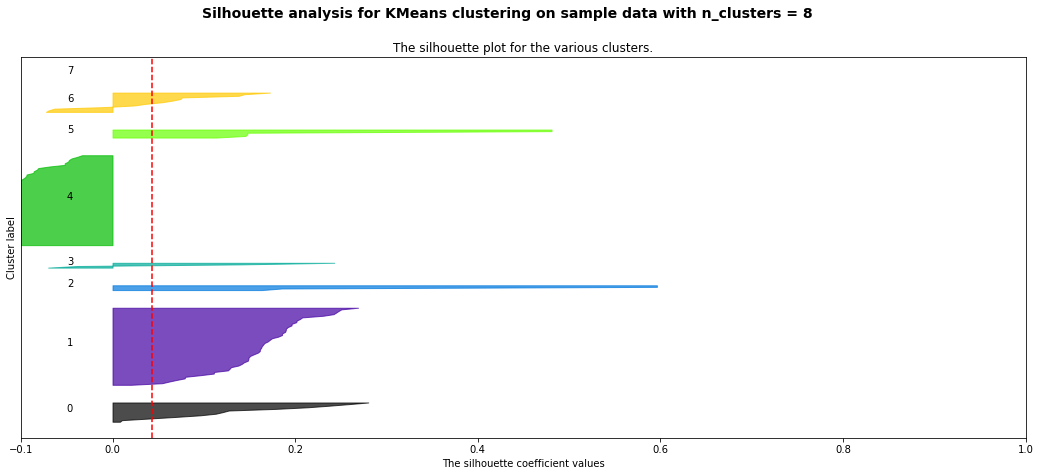

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 8]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### In this method we found that highest avg silhouette score for n_clusters=3 so we can select number of cluster k=3

#### apply clustering algorithm for clustering and segmenting neighborhood in delhi

In [43]:
k=3
kmeans=KMeans(n_clusters=k, random_state=0).fit(X)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [44]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Central Delhi,Daryaganj,Indian Restaurant,Restaurant,Hotel,Road,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
1,0,Central Delhi,Jhandewalan,Hotel,Motorcycle Shop,High School,Light Rail Station,Women's Store,Flea Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop
2,0,Central Delhi,Karol Bagh,Snack Place,Hotel,Camera Store,Dessert Shop,Donut Shop,Eastern European Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
3,0,Central Delhi,Paharganj,Hotel,Indian Restaurant,Fast Food Restaurant,Café,Bakery,Breakfast Spot,Snack Place,Bar,Korean Restaurant,Road
4,0,East Delhi,Anand Vihar,Mobile Phone Shop,Electronics Store,Farm,Women's Store,Flower Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop


In [47]:
neighborhoods_venues_sorted.isnull().sum()

Cluster Labels            0
Borough                   0
Neighborhood              0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [45]:
delhi_merged = df
# merge delhi_grouped with delhi_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.drop(["Borough"], 1).set_index("Neighborhood"), on="Neighborhood")
delhi_merged.head()

,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614193,77.0715,2.0,Indian Restaurant,Fast Food Restaurant,Dhaba,Diner,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
1,North West Delhi,Ashok Vihar,28.699453,77.1848,0.0,Indian Restaurant,Athletics & Sports,Bakery,Smoke Shop,Diner,Hotel Bar,Donut Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
2,North West Delhi,Azadpur,28.707657,77.1755,0.0,Pool Hall,Bus Station,Restaurant,Women's Store,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
3,North West Delhi,Bawana,28.799660,77.0329,1.0,ATM,Playground,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
4,North West Delhi,Begum Pur,28.725503,77.0584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### null value represent when we fetch neighborhood's popular near by venue in 500 meter with help of foursquare api then some of neighborhood like in begum pur near by 500 meter radius didn't get any popular venue means that not found any popular venue for begum pur neighborhood so that we remove record or row that contains null value in column

In [57]:
delhi_merged.shape

(159, 15)

In [58]:
delhi_merged = delhi_merged.dropna(subset=['Cluster Labels'])

In [59]:
delhi_merged.shape

(147, 15)

In [60]:
delhi_merged.isnull().sum()

Borough                   0
Neighborhood              0
latitude                  0
longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [61]:
delhi_merged.to_csv('delhi_merged.csv')

In [164]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
rainbow = ['red', 'blue', 'black', 'orange', 'darkgreen']

# add markers to the map
markers_colors = []
for lat, lon, bor, poi, cluster in zip(delhi_merged['latitude'], delhi_merged['longitude'], delhi_merged['Borough'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup('{},{} Cluster-{}'.format(poi, bor, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

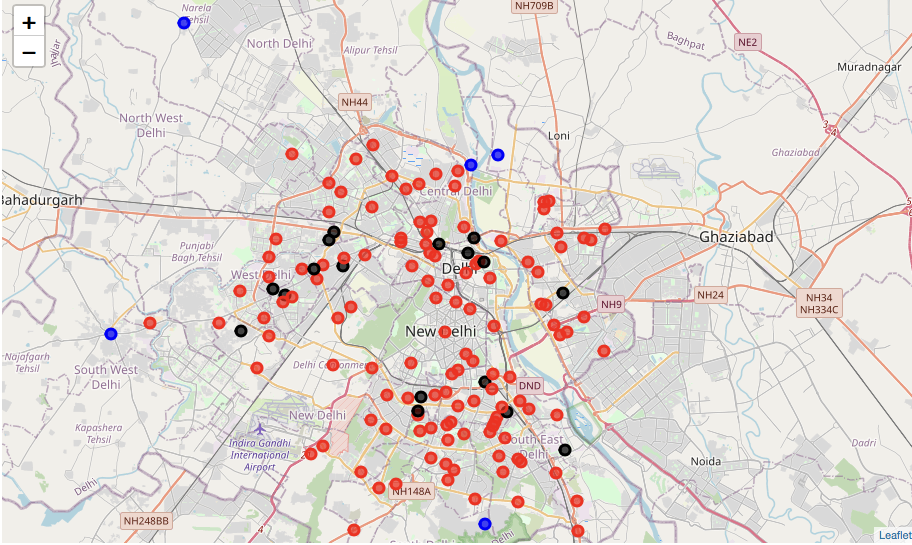

In [165]:
from IPython.display import Image
Image(filename='cluster_map.png') 

#### First cluster

In [62]:
first=delhi_merged.loc[delhi_merged['Cluster Labels'] == 0, delhi_merged.columns[[0, 1] + list(range(4, delhi_merged.shape[1]))]]
first

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North West Delhi,Ashok Vihar,0.0,Indian Restaurant,Athletics & Sports,Bakery,Smoke Shop,Diner,Hotel Bar,Donut Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
2,North West Delhi,Azadpur,0.0,Pool Hall,Bus Station,Restaurant,Women's Store,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
5,North West Delhi,Dhaka,0.0,Furniture / Home Store,Diner,Train Station,Pizza Place,Fast Food Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
6,North West Delhi,Jahangirpuri,0.0,Light Rail Station,Women's Store,Flower Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
8,North West Delhi,Keshav Puram,0.0,Indian Restaurant,Bakery,Gastropub,Food Truck,Café,Basketball Court,Department Store,Art Gallery,Garden Center,Furniture / Home Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,West Delhi,Patel Nagar,0.0,Café,Women's Store,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
165,West Delhi,Rajouri Garden,0.0,Indian Restaurant,Café,Diner,Park,Snack Place,Electronics Store,Market,Fast Food Restaurant,Gym,Bakery
167,West Delhi,Tihar Village,0.0,Indian Restaurant,Sculpture Garden,Sandwich Place,Bakery,Frozen Yogurt Shop,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
169,West Delhi,Uttam Nagar,0.0,ATM,Pizza Place,Spa,Accessories Store,Bakery,Indian Restaurant,Train Station,Toy / Game Store,Farmers Market,Food Truck


In [63]:
first.to_csv('first.csv')

#### second cluster

In [64]:
second=delhi_merged.loc[delhi_merged['Cluster Labels'] == 1, delhi_merged.columns[[0, 1] + list(range(4, delhi_merged.shape[1]))]]
second

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,North West Delhi,Bawana,1.0,ATM,Playground,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
12,North West Delhi,Narela,1.0,ATM,Men's Store,Flower Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
41,North Delhi,Wazirabad,1.0,ATM,Market,Flower Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
51,North East Delhi,Sonia Vihar,1.0,ATM,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
122,South Delhi,Sangam Vihar,1.0,ATM,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
143,South West Delhi,Najafgarh,1.0,ATM,Food & Drink Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Flower Shop,Flea Market


In [65]:
second.to_csv('second.csv')

#### third cluster

In [66]:
third=delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[0, 1] + list(range(4, delhi_merged.shape[1]))]]
third

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West Delhi,Adarsh Nagar,2.0,Indian Restaurant,Fast Food Restaurant,Dhaba,Diner,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
27,North Delhi,Kashmiri Gate,2.0,Metro Station,Pizza Place,Bus Station,Lake,Fast Food Restaurant,Flea Market,American Restaurant,Fabric Shop,Electronics Store,Farm
29,North Delhi,Lahori Gate,2.0,Monument / Landmark,Historic Site,Museum,Fast Food Restaurant,Women's Store,Flea Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop
32,North Delhi,Pul Bangash,2.0,Indian Restaurant,Metro Station,Fast Food Restaurant,Flower Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
34,North Delhi,Sadar Bazaar,2.0,Fast Food Restaurant,Boutique,Train Station,Restaurant,Historic Site,Women's Store,Food Truck,Food Court,Food & Drink Shop,Food
49,North East Delhi,Sadatpur,2.0,Fast Food Restaurant,Bakery,Breakfast Spot,Sandwich Place,Pizza Place,Bar,Women's Store,Food,French Restaurant,Food Truck
79,East Delhi,Preet Vihar,2.0,Fast Food Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,BBQ Joint,Flea Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
99,South Delhi,Jangpura,2.0,Fast Food Restaurant,BBQ Joint,Food,Hotel,Metro Station,Sandwich Place,Indie Movie Theater,Snack Place,Market,Chinese Restaurant
100,South Delhi,Jasola,2.0,Indian Restaurant,Soccer Field,Soccer Stadium,Bakery,Fast Food Restaurant,Flower Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
119,South Delhi,Safdarjung Enclave,2.0,Hotel,Fast Food Restaurant,Snack Place,French Restaurant,Fried Chicken Joint,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop


In [67]:
third.to_csv('third.csv')

In [68]:
first.iloc[:, :3]

,Borough,Neighborhood,Cluster Labels
1,North West Delhi,Ashok Vihar,0.0
2,North West Delhi,Azadpur,0.0
5,North West Delhi,Dhaka,0.0
6,North West Delhi,Jahangirpuri,0.0
8,North West Delhi,Keshav Puram,0.0
...,...,...,...
163,West Delhi,Patel Nagar,0.0
165,West Delhi,Rajouri Garden,0.0
167,West Delhi,Tihar Village,0.0
169,West Delhi,Uttam Nagar,0.0


#### let's define a function for explore cluster means that when we feed cluster data in these function and then these function return two dataframe new_data or explore in new_data contains number of different venue category and respective counts and second dataframe explore that contains data for furthur borough or neigherwise exploration and this function defined but function call is make for each cluster 

In [69]:
def explore_cluster(cluster):
    general=pd.read_csv('delhi_venues.csv')
    general.drop('Unnamed: 0', 1, inplace=True)
    explore=cluster.join(general.drop(["Borough"], 1).set_index('Neighborhood'), on='Neighborhood')
    count=explore['Venue_Category'].value_counts()
    data=pd.DataFrame(count)
    data['index']=[i for i in range(data.shape[0])]
    data['cat']=data.index
    data.index=data['index']
    new_data=data.drop(data.columns[1], axis=1)
    new_data.rename(columns={'Venue_Category': 'count', 'cat': 'Venue_category'}, inplace=True)
    return new_data, explore

## explore first cluster

In [226]:
First=first.iloc[:, :3]
First

,Borough,Neighborhood,Cluster Labels
1,North West Delhi,Ashok Vihar,0.0
2,North West Delhi,Azadpur,0.0
5,North West Delhi,Dhaka,0.0
6,North West Delhi,Jahangirpuri,0.0
8,North West Delhi,Keshav Puram,0.0
...,...,...,...
163,West Delhi,Patel Nagar,0.0
165,West Delhi,Rajouri Garden,0.0
167,West Delhi,Tihar Village,0.0
169,West Delhi,Uttam Nagar,0.0


In [227]:
Data, get_data=explore_cluster(First)
Data.head()

,count,Venue_category
index,,
0,107,Indian Restaurant
1,57,Café
2,45,Coffee Shop
3,43,Hotel
4,31,Restaurant


In [228]:
get_data.head()

,Borough,Neighborhood,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,SNAP FITNESS 24×7 GYM,28.700180,77.184582,Athletics & Sports
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,Grand Plaza,28.696577,77.185245,Hotel Bar
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,Tapri Opposite Shanti Royal,28.696780,77.187711,Smoke Shop


#### let's define plot function for graphical visualization 

In [229]:
def plot_(Data_, w=18, l=18, count=1, col='maroon', xfont=14, yfont=18, titlefont=18, text_font=14, tickfont=14):
    df=Data_[Data_['count']>=count] 
    fig, ax = plt.subplots(figsize=(w, l))
    plt.barh(df['Venue_category'], df['count'], color=col) 
    # Set tick font size
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(tickfont)
    plt.xlabel("count", fontsize=xfont) 
    plt.ylabel("Venue_category", fontsize=yfont) 
    plt.title("count >= {}, unique venue category {}".format(count, Data_.shape[0]), fontsize=titlefont) 
    for index, value in enumerate(df['count']):
        plt.text(value, index, str(value), fontsize=text_font)
    plt.show() 

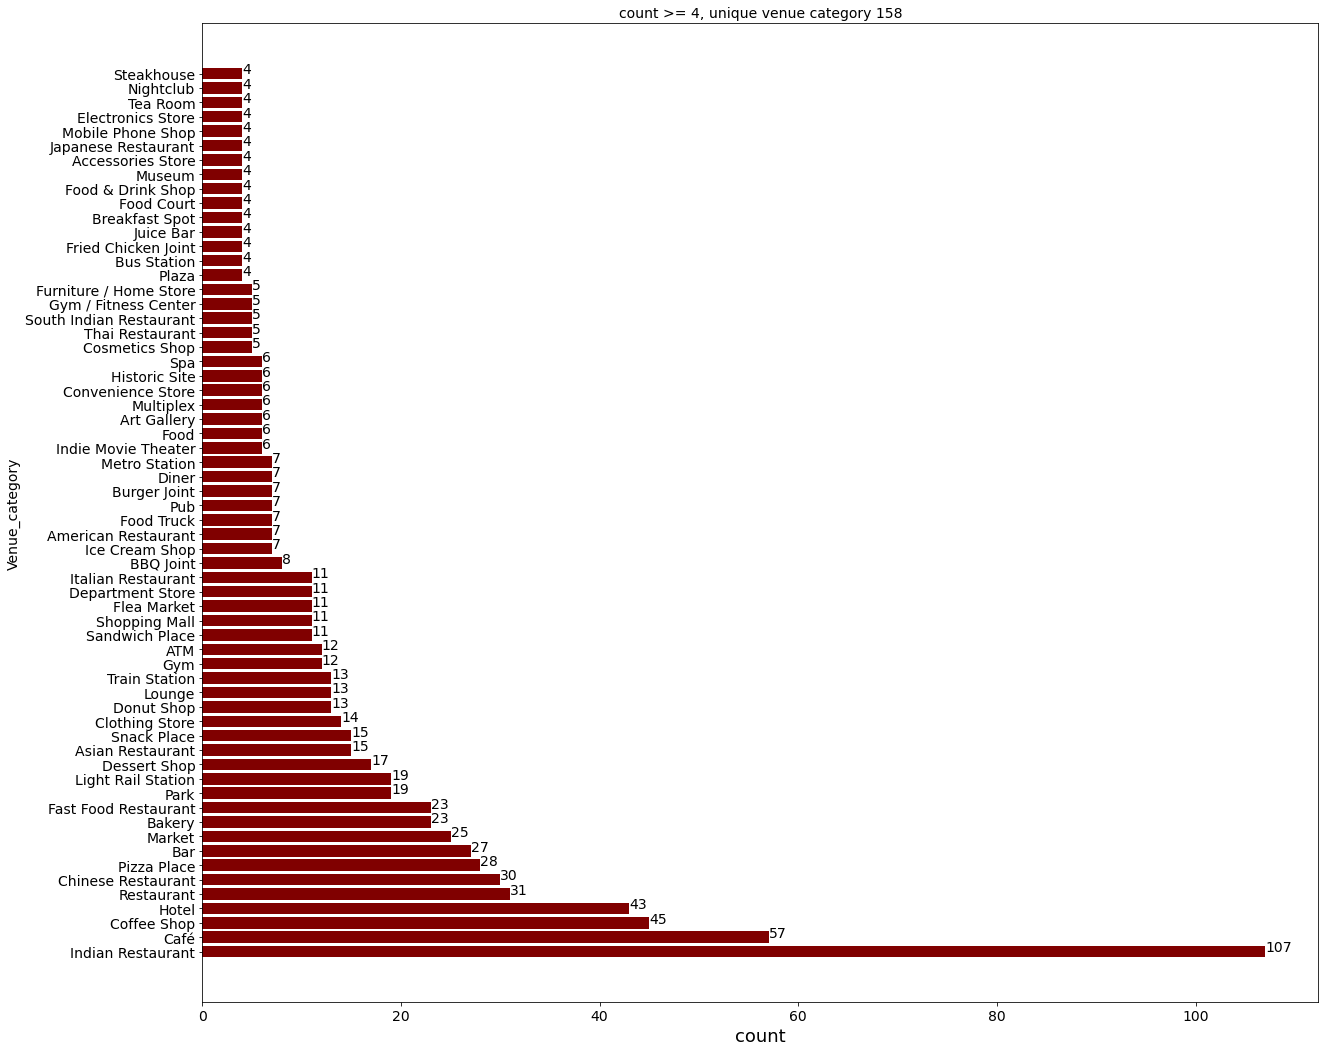

In [234]:
#w = widthsize, l=length or height of figure xfont=xlabel fontsize, yfont=ylabel fontszie, titlefont, tickfontsize=xaxis or yaxis value's font size

#we can also adjust this parameter for batter visualization
plot_(Data, l=18, w=20, count=4, yfont=14, titlefont=14, text_font=14, xfont=18)

#### Borough Wise

In [235]:
borough=get_data['Borough'].unique().tolist()
borough

['North West Delhi',
 'North Delhi',
 'North East Delhi',
 'Central Delhi',
 'New Delhi',
 'East Delhi',
 'South Delhi',
 'South West Delhi',
 'West Delhi']

In [236]:
get_data[['Borough', 'Venue_Category']].groupby(['Borough']).count().sort_values(by=['Venue_Category'], ascending=False)

,Venue_Category
Borough,
South Delhi,376
New Delhi,159
South West Delhi,100
North Delhi,96
West Delhi,82
East Delhi,59
North West Delhi,55
Central Delhi,43
North East Delhi,14


#### let's define a function for explore each borough mean that we pass borough name and then get different venue category and respective count in. dataframe and  in this function pass borough name or dataframe that retrive from explore_cluster function that contains borough, neighborhood or latitude or longitude, venue category or in this dataframe cluster label same means that in cluster label column value same

In [237]:
def explore_borough(BOR, explore):
    bor=explore[explore['Borough']==BOR]
    count=bor['Venue_Category'].value_counts()
    data=pd.DataFrame(count)
    data['index']=[i for i in range(data.shape[0])]
    data['cat']=data.index 
    data.index=data['index']
    new_data1=data.drop(data.columns[1], axis=1)
    new_data1.rename(columns={'Venue_Category': 'count', 'cat': 'Venue_category'}, inplace=True)
    return new_data1

In [238]:
get_data.head()

,Borough,Neighborhood,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,SNAP FITNESS 24×7 GYM,28.700180,77.184582,Athletics & Sports
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,Grand Plaza,28.696577,77.185245,Hotel Bar
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner
1,North West Delhi,Ashok Vihar,0.0,28.699453,77.184826,Tapri Opposite Shanti Royal,28.696780,77.187711,Smoke Shop


In [239]:
borough_data=explore_borough(BOR='South Delhi', explore=get_data)
borough_data

,count,Venue_category
index,,
0,43,Indian Restaurant
1,24,Café
2,23,Coffee Shop
3,19,Restaurant
4,17,Bar
...,...,...
82,1,Gastropub
83,1,Burmese Restaurant
84,1,Sculpture Garden


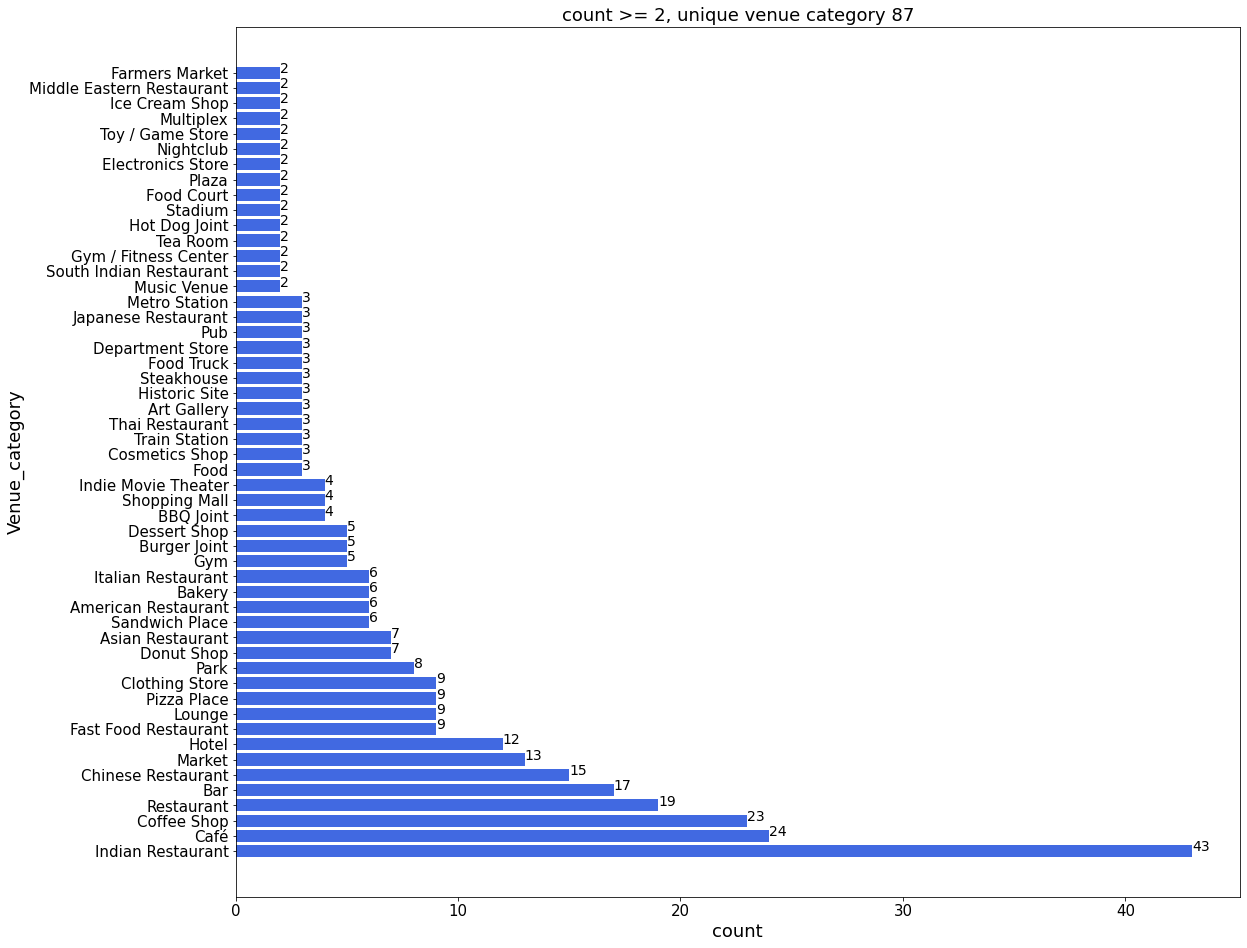

In [244]:
#tickfontsize=xaxis or yaxis value's font size
plot_(borough_data, l=16, w=18, count=2, col='royalblue', yfont=18, titlefont=18, text_font=14, xfont=18, tickfont=15)

#### Neighborhood wise

In [245]:
Neighbor=get_data['Neighborhood'].unique().tolist()
Neighbor

['Ashok Vihar',
 'Azadpur',
 'Dhaka',
 'Jahangirpuri',
 'Keshav Puram',
 'Kingsway Camp',
 'Kohat Enclave',
 'Model Town',
 'Pitam Pura',
 'Rani Bagh',
 'Rithala',
 'Shalimar Bagh',
 'Shakti Nagar',
 'Bara Hindu Rao',
 'Chandni Chowk',
 'Chawri Bazaar',
 'Civil Lines',
 'Dariba Kalan',
 'Gulabi Bagh',
 'Kamla Nagar',
 'Nehru Vihar',
 'Pratap Nagar',
 'Roshanara Bagh',
 'Sant Nagar',
 'Sarai Kale Khan',
 'Sarai Rohilla',
 'Shastri Nagar',
 'Timarpur',
 'Babarpur',
 'Dilshad Garden',
 'Kabir Nagar',
 'Maujpur',
 'Shahdara',
 'Shastri Park',
 'Daryaganj',
 'Jhandewalan',
 'Karol Bagh',
 'Paharganj',
 'Barakhamba Road',
 'Chanakyapuri',
 'Connaught Place',
 'Gautampuri',
 'Gole Market',
 'Golf Links',
 'INA Colony',
 'Khan Market',
 'Laxmibai Nagar',
 'Pragati Maidan',
 'East Vinod Nagar',
 'Gandhi Nagar',
 'Geeta Colony',
 'Jhilmil Colony',
 'Krishna Nagar',
 'Laxmi Nagar',
 'Mayur Vihar',
 'Pandav Nagar',
 'Patparganj',
 'Anand Vihar',
 'Shakarpur',
 'Vasundhara Enclave',
 'Vishwas Nagar

In [246]:
get_data[['Neighborhood', 'Venue_Category']].groupby(['Neighborhood']).count().sort_values(by=['Venue_Category'], ascending=False)

,Venue_Category
Neighborhood,
Connaught Place,72
Khirki Village,71
Hauz Khas Village,49
Khan Market,44
Nehru Place,33
...,...
Golf Links,1
Shastri Park,1
Shalimar Bagh,1


#### let's define a function for explore each neighborhood mean that we pass neighborhood name and then get different venue category and respective count in. dataframe and  in this function pass neighborhood name or dataframe that retrive from explore_cluster function that contains borough neighborhood or latitude or longitude, venue category or in this dataframe cluster label same means that in cluster label column value same

In [247]:
def explore_Neighbor(neigh, explore):
    bor=explore[explore['Neighborhood']==neigh]
    count=bor['Venue_Category'].value_counts()
    data=pd.DataFrame(count)
    data['index']=[i for i in range(data.shape[0])]
    data['cat']=data.index 
    data.index=data['index']
    new_data=data.drop(data.columns[1], axis=1)
    new_data.rename(columns={'Venue_Category': 'count', 'cat': 'Venue_category'}, inplace=True)
    return new_data

In [248]:
neighbor_data=explore_Neighbor(neigh='Connaught Place', explore=get_data)
neighbor_data

,count,Venue_category
index,,
0,10,Indian Restaurant
1,6,Café
2,6,Chinese Restaurant
3,5,Bar
4,4,Coffee Shop
5,3,Lounge
6,2,South Indian Restaurant
7,2,Hotel
8,2,Italian Restaurant


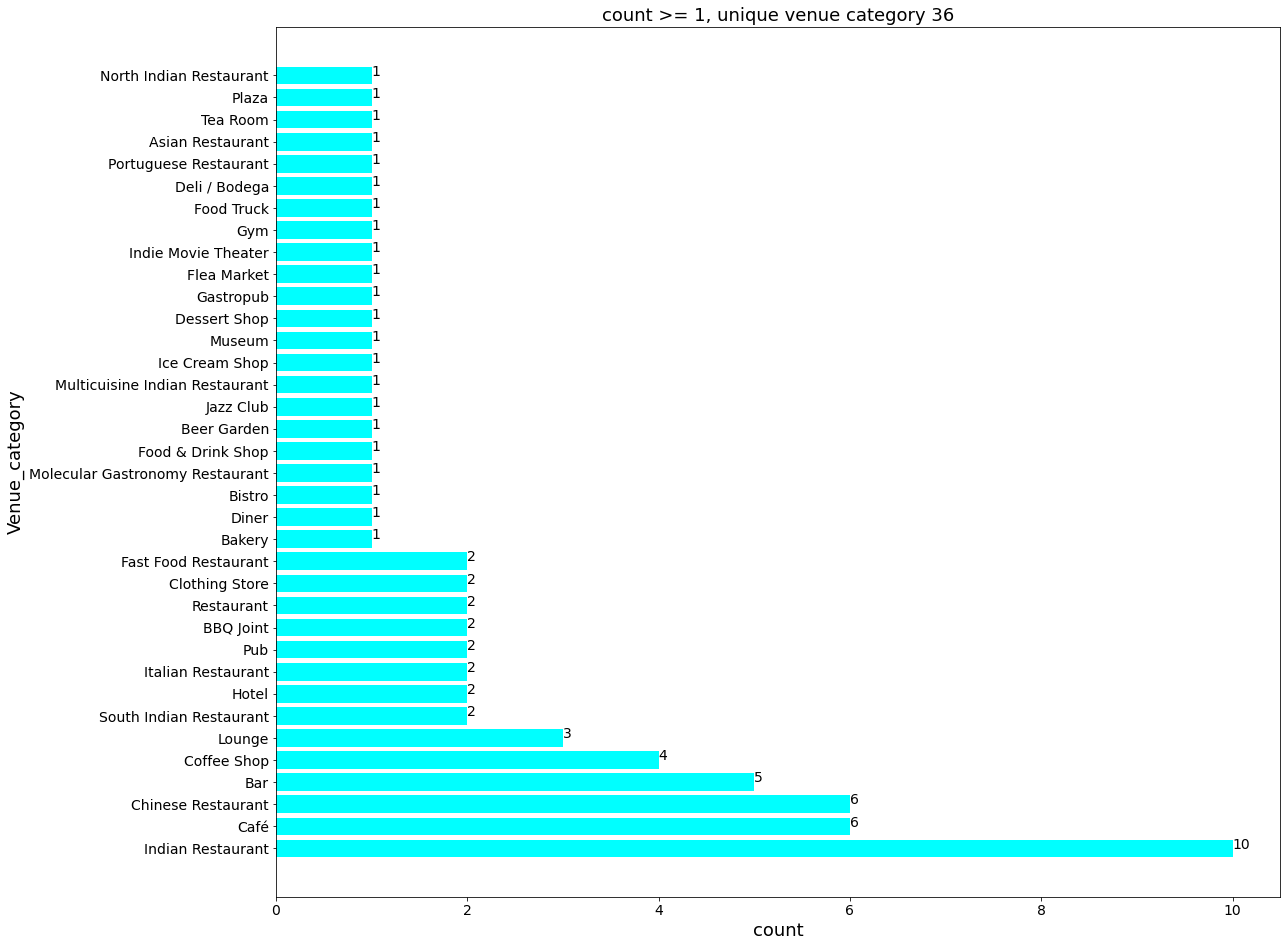

In [251]:
plot_(neighbor_data, l=16, w=18, col='cyan', yfont=18, titlefont=18, text_font=14, xfont=18)

## Now Explore second cluster

In [252]:
Second=second.iloc[:, :3]
Second

,Borough,Neighborhood,Cluster Labels
3,North West Delhi,Bawana,1.0
12,North West Delhi,Narela,1.0
41,North Delhi,Wazirabad,1.0
51,North East Delhi,Sonia Vihar,1.0
122,South Delhi,Sangam Vihar,1.0
143,South West Delhi,Najafgarh,1.0


In [253]:
Data1, get_data1=explore_cluster(Second)
Data1

,count,Venue_category
index,,
0,7,ATM
1,1,Food & Drink Shop
2,1,Men's Store
3,1,Market
4,1,Playground


In [254]:
get_data1

,Borough,Neighborhood,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
3,North West Delhi,Bawana,1.0,28.799660,77.032885,Axis Bank ATM,28.800700,77.036600,ATM
3,North West Delhi,Bawana,1.0,28.799660,77.032885,Rajiv Gandhi Stadium,28.801811,77.028751,Playground
12,North West Delhi,Narela,1.0,28.842610,77.091835,Axis Bank ATM,28.844554,77.089067,ATM
12,North West Delhi,Narela,1.0,28.842610,77.091835,brahma cloth,28.845473,77.088786,Men's Store
41,North Delhi,Wazirabad,1.0,28.714012,77.229940,Kashmiri Gate,28.714170,77.228102,Market
41,North Delhi,Wazirabad,1.0,28.714012,77.229940,Axis Bank ATM,28.711940,77.228040,ATM
51,North East Delhi,Sonia Vihar,1.0,28.719926,77.248182,Axis Bank ATM,28.718796,77.244384,ATM
51,North East Delhi,Sonia Vihar,1.0,28.719926,77.248182,Axis Bank ATM,28.715580,77.246990,ATM
122,South Delhi,Sangam Vihar,1.0,28.497702,77.239174,HDFC Bank ATM,28.498910,77.239000,ATM
143,South West Delhi,Najafgarh,1.0,28.612304,76.982391,Axis Bank ATM,28.611747,76.979754,ATM


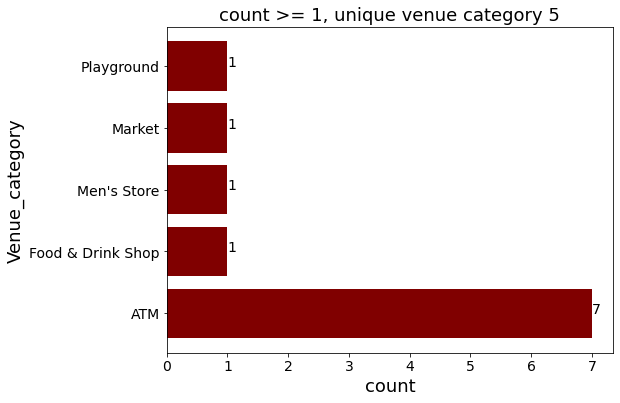

In [255]:
plot_(Data1, l=6, w=8, yfont=18, titlefont=18, text_font=14, xfont=18)

#### Borough wise for second cluster

In [256]:
borough1=get_data1['Borough'].unique().tolist()
borough1

['North West Delhi',
 'North Delhi',
 'North East Delhi',
 'South Delhi',
 'South West Delhi']

In [257]:
get_data1[['Borough', 'Venue_Category']].groupby(['Borough']).count().sort_values(by=['Venue_Category'], ascending=False)

,Venue_Category
Borough,
North West Delhi,4
North Delhi,2
North East Delhi,2
South West Delhi,2
South Delhi,1


In [258]:
borough_data1=explore_borough(BOR='North West Delhi', explore=get_data1)
borough_data1

,count,Venue_category
index,,
0,2,ATM
1,1,Men's Store
2,1,Playground


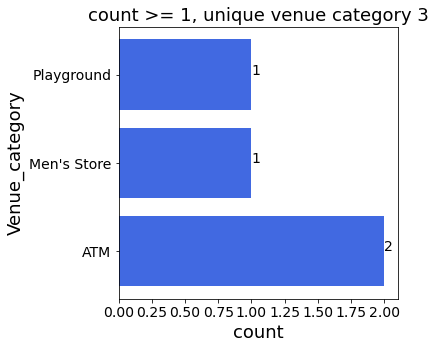

In [259]:
plot_(borough_data1, col='royalblue', l=5, w=5, yfont=18, titlefont=18, text_font=14, xfont=18)

#### Neighbor wise for second cluster

In [260]:
Neighbor1=get_data1['Neighborhood'].unique().tolist()
Neighbor1

['Bawana', 'Narela', 'Wazirabad', 'Sonia Vihar', 'Sangam Vihar', 'Najafgarh']

In [261]:
get_data1[['Neighborhood', 'Venue_Category']].groupby(['Neighborhood']).count().sort_values(by=['Venue_Category'], ascending=False)

,Venue_Category
Neighborhood,
Bawana,2
Najafgarh,2
Narela,2
Sonia Vihar,2
Wazirabad,2
Sangam Vihar,1


In [262]:
neighbor_data1=explore_Neighbor(neigh='Bawana', explore=get_data1)
neighbor_data1

,count,Venue_category
index,,
0,1,ATM
1,1,Playground


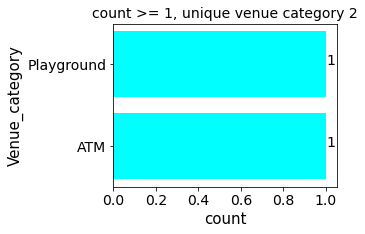

In [263]:
plot_(neighbor_data1, col='cyan', l=3, w=4, yfont=15, titlefont=14, text_font=14, xfont=15)

## explore third cluster

In [264]:
Third=third.iloc[:, :3]
Third

,Borough,Neighborhood,Cluster Labels
0,North West Delhi,Adarsh Nagar,2.0
27,North Delhi,Kashmiri Gate,2.0
29,North Delhi,Lahori Gate,2.0
32,North Delhi,Pul Bangash,2.0
34,North Delhi,Sadar Bazaar,2.0
49,North East Delhi,Sadatpur,2.0
79,East Delhi,Preet Vihar,2.0
99,South Delhi,Jangpura,2.0
100,South Delhi,Jasola,2.0
119,South Delhi,Safdarjung Enclave,2.0


In [265]:
Data2, get_data2=explore_cluster(Third)
Data2

,count,Venue_category
index,,
0,33,Fast Food Restaurant
1,11,Indian Restaurant
2,8,Pizza Place
3,5,Restaurant
4,4,Bakery
5,4,Hotel
6,4,Sandwich Place
7,3,Snack Place
8,3,Metro Station


In [266]:
get_data2.head()

,Borough,Neighborhood,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,North West Delhi,Adarsh Nagar,2.0,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
0,North West Delhi,Adarsh Nagar,2.0,28.614192,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
27,North Delhi,Kashmiri Gate,2.0,28.669977,77.232059,Domino's Pizza,28.668000,77.228000,Pizza Place
27,North Delhi,Kashmiri Gate,2.0,28.669977,77.232059,Yamuna,28.671581,77.232239,Lake
27,North Delhi,Kashmiri Gate,2.0,28.669977,77.232059,ISBT Kashmere Gate,28.668930,77.230836,Bus Station


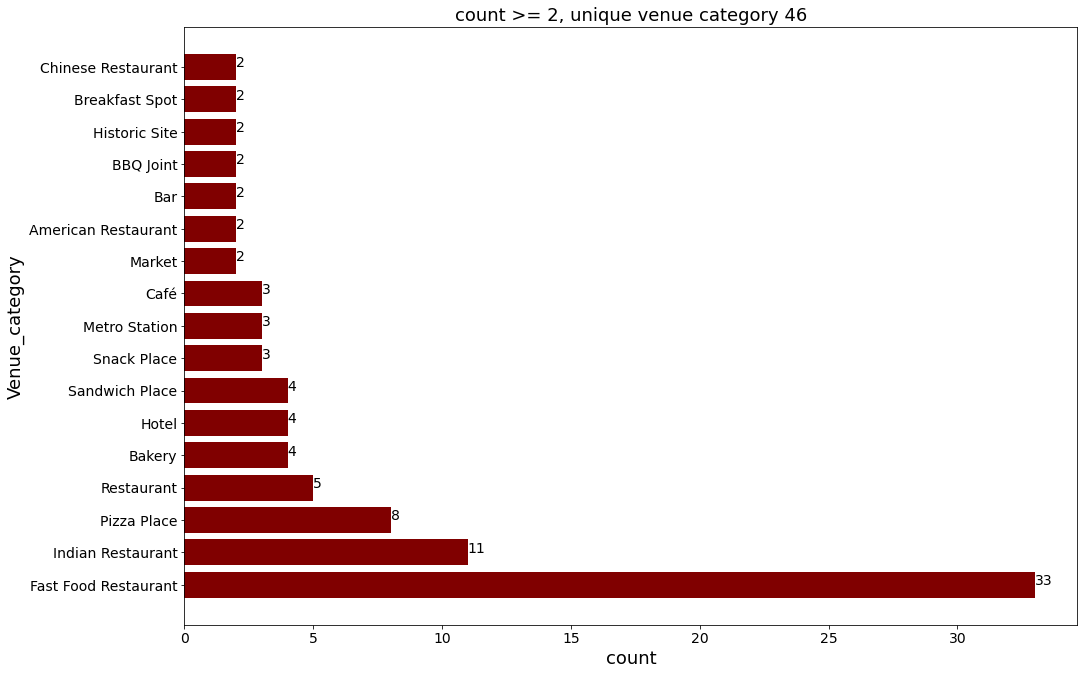

In [267]:
plot_(Data2, l=11, w=16, count=2, yfont=18, titlefont=18, text_font=14, xfont=18)

#### Borough wise

In [268]:
borough2=get_data2['Borough'].unique().tolist()
borough2

['North West Delhi',
 'North Delhi',
 'North East Delhi',
 'East Delhi',
 'South Delhi',
 'South West Delhi',
 'West Delhi']

In [269]:
get_data2[['Borough', 'Venue_Category']].groupby(['Borough']).count().sort_values(by=['Venue_Category'], ascending=False)

,Venue_Category
Borough,
West Delhi,46
South Delhi,28
North Delhi,20
South West Delhi,12
North East Delhi,8
East Delhi,5
North West Delhi,2


In [270]:
borough_data2=explore_borough(BOR='West Delhi', explore=get_data2)
borough_data2

,count,Venue_category
index,,
0,15,Fast Food Restaurant
1,4,Indian Restaurant
2,3,Pizza Place
3,3,Restaurant
4,3,Café
5,2,Sandwich Place
6,1,Snack Place
7,1,Nightclub
8,1,Cosmetics Shop


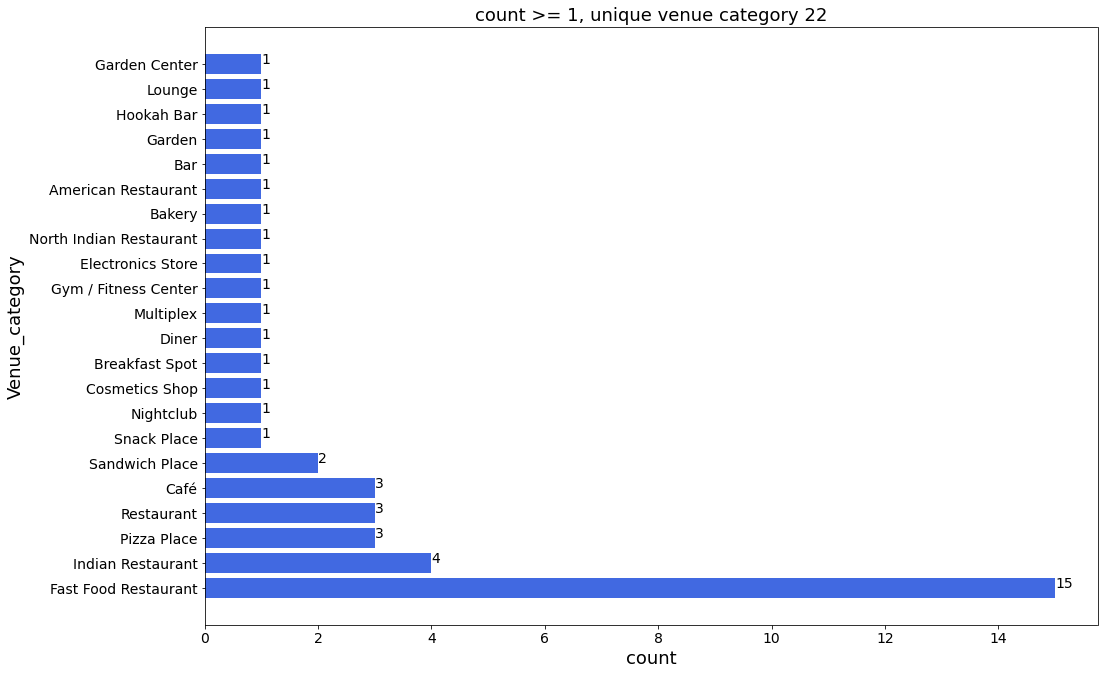

In [271]:
plot_(borough_data2, l=11, w=16, col='royalblue', yfont=18, titlefont=18, text_font=14, xfont=18)

#### Neighbor wise for third cluster

In [272]:
Neighbor2=get_data2['Neighborhood'].unique().tolist()
Neighbor2

['Adarsh Nagar',
 'Kashmiri Gate',
 'Lahori Gate',
 'Pul Bangash',
 'Sadar Bazaar',
 'Sadatpur',
 'Preet Vihar',
 'Jangpura',
 'Jasola',
 'Safdarjung Enclave',
 'Sriniwaspuri',
 'Sarojini Nagar',
 'Ashok Nagar',
 'Kirti Nagar',
 'Punjabi Bagh',
 'Shivaji Place',
 'Tilak Nagar']

In [273]:
get_data2[['Neighborhood', 'Venue_Category']].groupby(['Neighborhood']).count().sort_values(by=['Venue_Category'], ascending=False)

,Venue_Category
Neighborhood,
Shivaji Place,21
Sarojini Nagar,12
Jangpura,11
Ashok Nagar,9
Punjabi Bagh,9
Sadatpur,8
Kashmiri Gate,7
Safdarjung Enclave,7
Jasola,6


In [274]:
neighbor_data2=explore_Neighbor(neigh='Shivaji Place', explore=get_data2)
neighbor_data2

,count,Venue_category
index,,
0,4,Fast Food Restaurant
1,3,Indian Restaurant
2,3,Café
3,1,Restaurant
4,1,Cosmetics Shop
5,1,Snack Place
6,1,Hookah Bar
7,1,American Restaurant
8,1,Garden


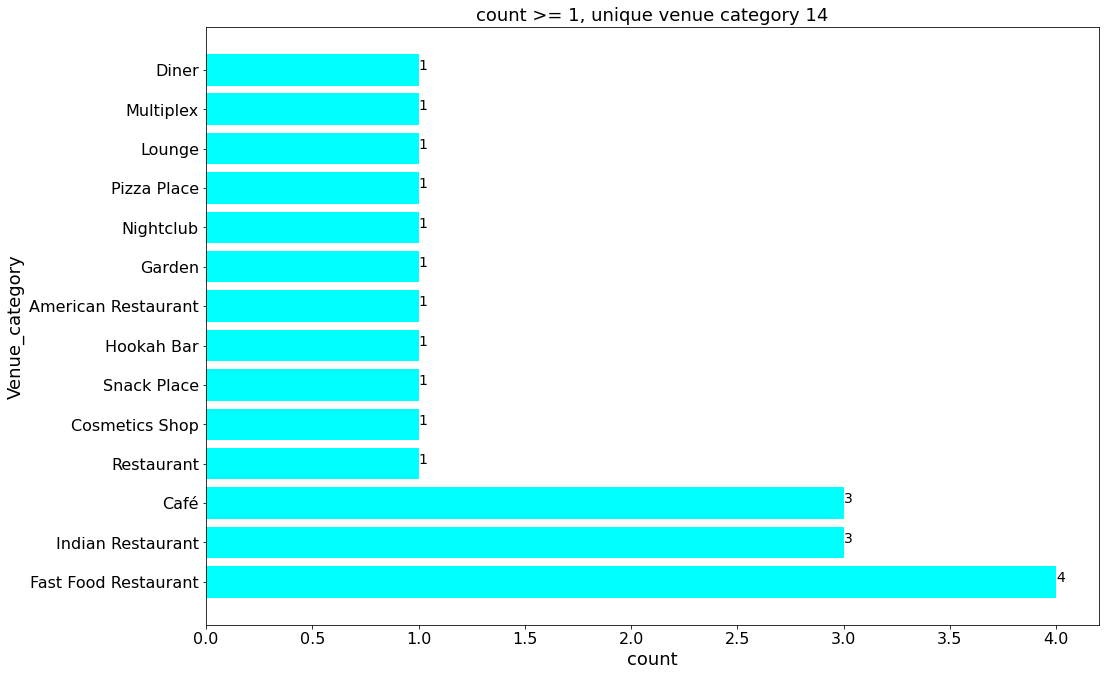

In [275]:
plot_(neighbor_data2, l=11, w=16, col='cyan', yfont=18, titlefont=18, text_font=14, xfont=18, tickfont=16)

In [276]:
print('done!')

done!
